In [1]:
import pandas as pd # data processing
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [6]:
df= df.iloc[:,2:]

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
207,52,114000,0
166,22,55000,0
91,30,116000,0
200,35,39000,0
396,51,23000,1


In [11]:
x= df.drop("Purchased", axis = 1)
y = df["Purchased"]

In [14]:
from sklearn.model_selection import train_test_split

TRAIN TEST SPLIT

In [16]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=0)

In [17]:
x_train.shape , x_test.shape

((280, 2), (120, 2))

Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [21]:
#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

StandardScaler()

In [22]:
# tranform train and test sets

In [24]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)


In [34]:
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [35]:
np.round(x_test_scaled.describe())

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,0.0
max,2.0,2.0


EFFECT OF SCALING

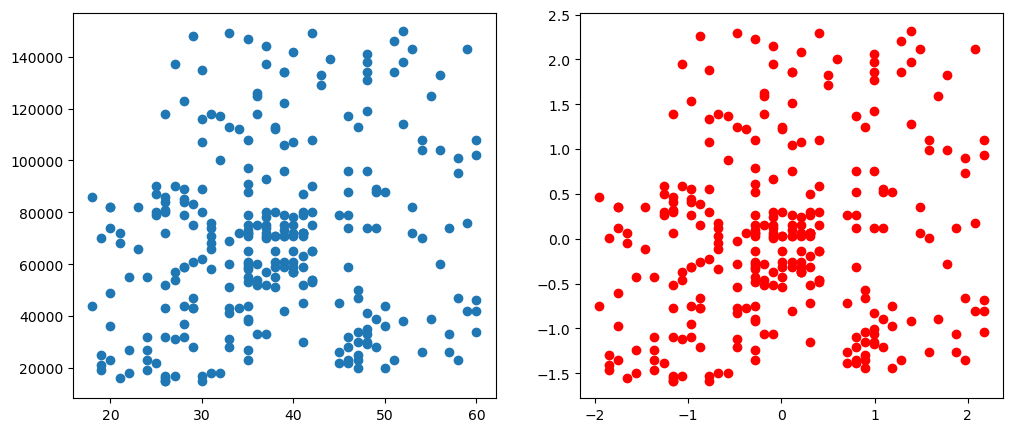

In [49]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color ="red")

Text(0.5, 1.0, 'After Scaling')

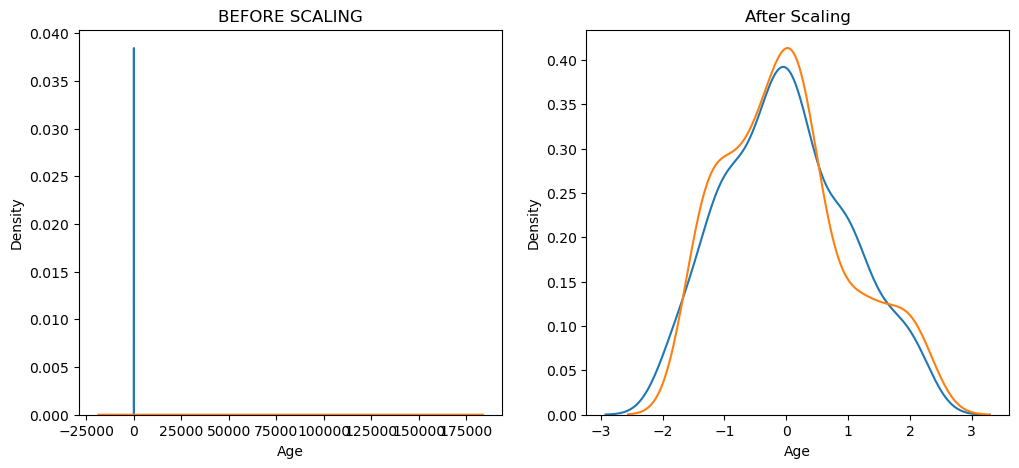

In [58]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
#BEFORE SCALING
ax1.set_title ("BEFORE SCALING")
sns.kdeplot(x_train["Age"], ax = ax1)
sns.kdeplot(x_train["EstimatedSalary"], ax = ax1)

#after scaling

sns.kdeplot(x_train_scaled["Age"])
sns.kdeplot(x_train_scaled["EstimatedSalary"])
ax2.set_title ("After Scaling")

Comparison of Distributions

Text(0.5, 1.0, 'After Scaling')

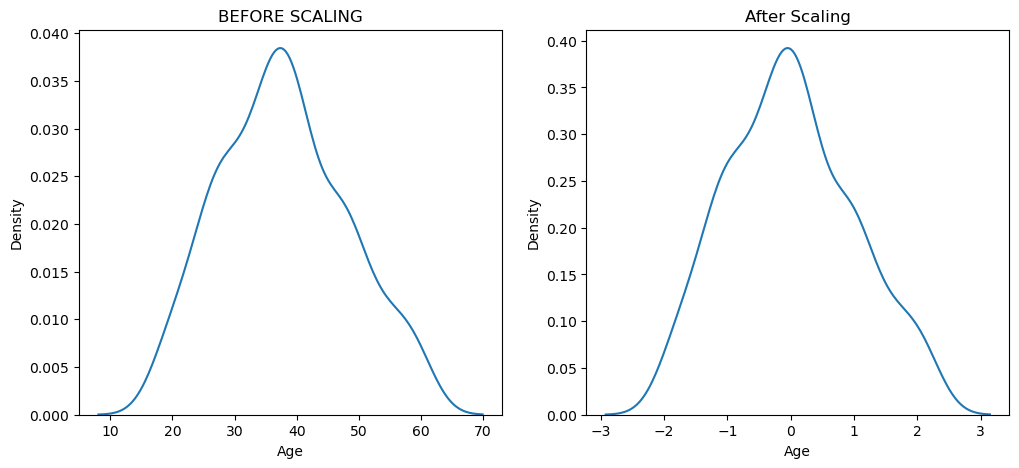

In [59]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
#BEFORE SCALING
ax1.set_title ("BEFORE SCALING")
sns.kdeplot(x_train["Age"], ax = ax1)


#after scaling

sns.kdeplot(x_train_scaled["Age"])

ax2.set_title ("After Scaling")

Text(0.5, 1.0, 'After Scaling')

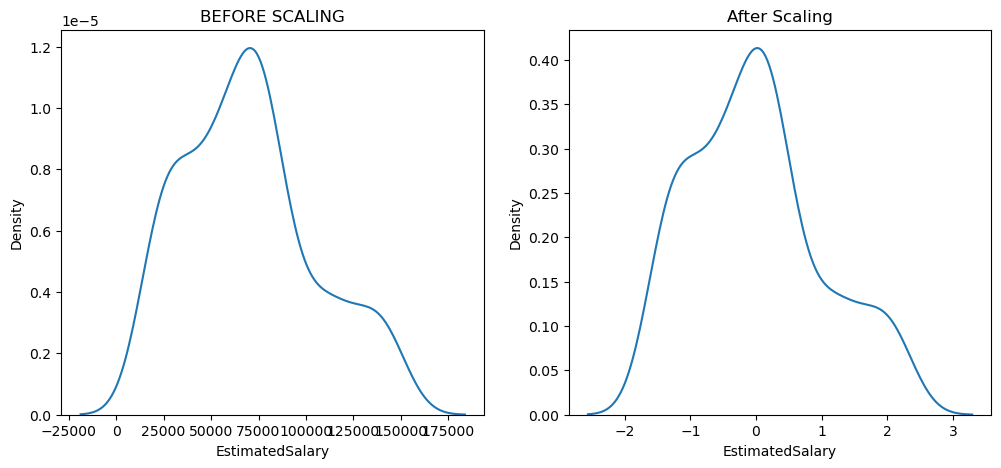

In [60]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
#BEFORE SCALING
ax1.set_title ("BEFORE SCALING")

sns.kdeplot(x_train["EstimatedSalary"], ax = ax1)

#after scaling

sns.kdeplot(x_train_scaled["EstimatedSalary"])
ax2.set_title ("After Scaling")

WHY SCALING IS IMPORTANT 

In [62]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [69]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [76]:
y_pred= lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [72]:
from sklearn.metrics import accuracy_score

In [77]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667
